In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
og_data = pd.read_csv('/content/drive/MyDrive/data/Mall_Customers.csv')
og_data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data = og_data.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isna().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
data.nunique()

CustomerID            200
Genre                   2
Age                    51
Annual_Income_(k$)     64
Spending_Score         84
dtype: int64

In [10]:
data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
data["Genre"] = data["Genre"].replace(['Female','Male'],[0,1])

In [14]:
del data["CustomerID"]

In [15]:
data

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [16]:
data.value_counts()

Genre  Age  Annual_Income_(k$)  Spending_Score
0      18   65                  48                1
1      29   28                  82                1
       24   60                  52                1
       25   24                  73                1
            77                  12                1
                                                 ..
0      41   99                  39                1
            103                 17                1
       42   34                  17                1
       43   48                  50                1
1      70   49                  55                1
Length: 200, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=20)

In [25]:
test

,Genre,Age,Annual_Income_(k$),Spending_Score
150,1,43,78,17
28,0,40,29,31
13,0,24,20,77
178,1,59,93,14
109,1,66,63,48
168,0,36,87,27
177,1,27,88,69
196,0,45,126,28
47,0,27,40,47
195,0,35,120,79


In [26]:
train.value_counts()

Genre  Age  Annual_Income_(k$)  Spending_Score
0      18   65                  48                1
       19   63                  54                1
1      25   24                  73                1
            77                  12                1
       26   54                  54                1
                                                 ..
0      42   34                  17                1
       43   48                  50                1
       44   78                  20                1
       45   28                  32                1
1      70   49                  55                1
Length: 160, dtype: int64

In [28]:
scaler = MinMaxScaler()
scaler.fit(data)
data_scale = pd.DataFrame(scaler.transform(data), columns=data.columns)
data_scale
#donw grade number

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

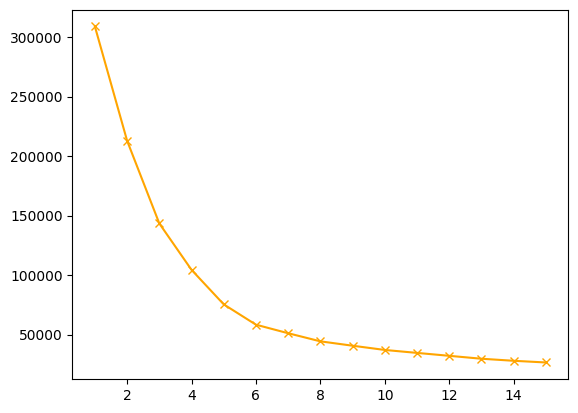

In [35]:
inertia = []
for i in range(1,16):
    kmeans = KMeans(
        n_clusters=i, init="k-means++"
    )
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 16), inertia, color='orange', marker='x')

In [38]:
kmeans = KMeans(
        n_clusters=15, init="k-means++"
    )

In [37]:
kmeans.fit(data_scale)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15)